# Detection outlier using  Standard Deviation

### The dataset name is "Weight_height dataset"

In [1]:
# !pip install matplotlib
# !pip install scipy
# !pip install stats


In [2]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(5,3)

In [3]:
# This dataset is from the kaggle.com "Weight_height dataset"
df_1 = pd.read_csv("C:/Users/HP/OneDrive/Desktop/weight-height.csv")
df_1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df_1.drop("Weight",axis=1,inplace=True)
df_1.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


#### Standard deviation for population 
$\sigma = \sqrt\frac{\sum{(X-\mu)^2}}{N}$ 

####  Standard deviation for Sample
$s = \sqrt\frac{\sum{(x_i-\bar{x})^2}}{n-1}$

In [5]:
df_1.Height.describe() 

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

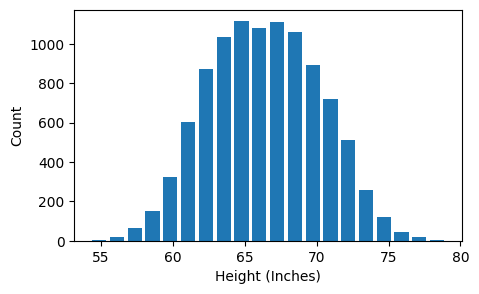

In [6]:
# Ploting the histogram to see how the data looks
plt.hist(df_1.Height,rwidth=0.8,bins=20)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")
plt.show()

In [7]:
# https://www.mathsisfun.com/data/standard-normal-distribution.html (about the normal distribution)

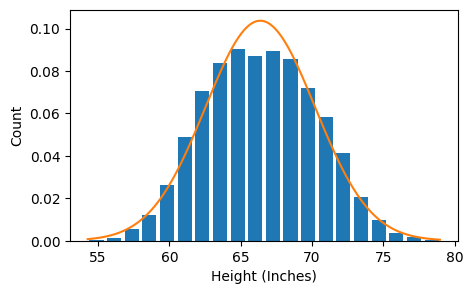

In [8]:
# We will try to plot bell curve 
from scipy.stats import norm
plt.hist(df_1.Height,rwidth=0.8,bins=20,density=True)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")

rng=np.arange(df_1.Height.min(),df_1.Height.max(),0.1)
'''arange(start_digit,end_digit,step)-- 
it will give the number between start_digit and end_digit by taking this no of steps of every digit'''

plt.plot(rng,norm.pdf(rng,df_1.Height.mean(),df_1.Height.std()))

In [9]:
df_1.Height.std()

3.8475281207732293

In [10]:
'''
1. Mostly in the industry people use 3 standard deviation and above that they take it as outlier
2. But if we have less data then we can use 2 standard deviation also
3. We need to use the sense of the judgment to find the best standard deviation for our datsets
'''
df_1.Height.mean()

66.36755975482124

### (1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [11]:
''' Here we are taking the threshold values as standard 3'''
# we will find the upper limit
upper_limit=df_1.Height.mean()+3*df_1.Height.std()
upper_limit

77.91014411714093

In [12]:
lower_limit=df_1.Height.mean()-3*df_1.Height.std()
lower_limit

54.82497539250156

In [13]:
# what are the data point are the outlier
df_1[(df_1.Height<lower_limit) | (df_1.Height>upper_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

Now remove these outliers and generate new dataframe

In [14]:
sd_no_outlier_std_dev =df_1[(df_1.Height>lower_limit) & (df_1.Height<upper_limit)]
sd_no_outlier_std_dev 

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [15]:
sd_no_outlier_std_dev.describe()

,Height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


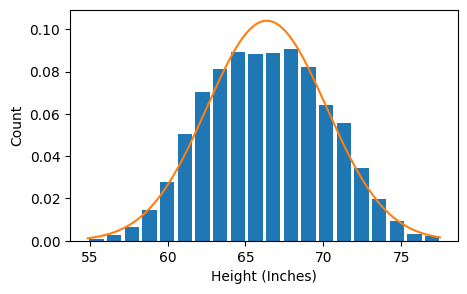

In [16]:
from scipy.stats import norm
plt.hist(sd_no_outlier_std_dev.Height,rwidth=0.8,bins=20,density=True)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")

rng=np.arange(sd_no_outlier_std_dev.Height.min(),sd_no_outlier_std_dev.Height.max(),0.1)
'''arange(start_digit,end_digit,step)-- 
it will give the number between start_digit and end_digit by taking this no of steps of every digit'''

plt.plot(rng,norm.pdf(rng,sd_no_outlier_std_dev.Height.mean(),sd_no_outlier_std_dev.Height.std()))

# Detection outlier using Zscore

### Z score is a way to achieve same thing that we did above in part (1)

### Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)





### Calculate the Z Score
## $ Z = \frac{x - \mu}{\sigma} $

$\mu = Mean$



$\sigma=Standard$  $deviation$

In [17]:
df_1["Zscore"]=(df_1.Height-df_1.Height.mean())/df_1.Height.std()
df_1.head()

,Gender,Height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [18]:
# How we get the standard deviation
(73.847017-66.36755975482124)/3.8475281207732293

1.9439642831448936

Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [19]:
# we are taking ourlier point as Standard deviation 3
# we are going to pull our all the datapoint which has more standard deviation then 3
df_1[df_1.Zscore>3]

,Gender,Height,Zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [20]:
df_1[df_1.Zscore<-3]

,Gender,Height,Zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [21]:
df_1[(df_1.Zscore>3)|(df_1.Zscore<-3)]

,Gender,Height,Zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [22]:
Zscore_no_outlier=df_1[(df_1.Zscore<3)& (df_1.Zscore>-3)]
Zscore_no_outlier

,Gender,Height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [23]:
df_1.shape[0]-Zscore_no_outlier.shape[0]

7